INTRODUCTION:

The human heart is an electrical organ i.e. a charge appears on heart muscles due to movement of electrolyte between the heart cells and that leads to contraction of heart. 
Electrocardiogram or ECG is a graph of electrical activity of heart. ECG signals are widely used to determine the heart health. In this project, we will be working on pre acquired ECG signal which is sampled at 750 Hz and has 12 bit resolution. We will be converting the signal to frequency domain and perform fourier transform and filtering subsequently.

First we plot the whole signal below

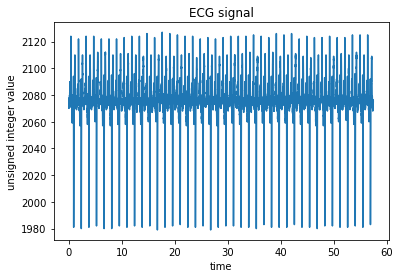

In [1]:
%matplotlib inline
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

f=open('aami3a.dat','rb') #opening the ecg file
AllSignal=np.fromfile(f,count=-1,dtype=np.uint16) #reading the file
x=np.arange(0,43081/750.,1/750.) #creating time array start 0 end 43081/750 and step size 1/750
plt.plot(x,AllSignal)
plt.title('ECG signal')
plt.xlabel('time')
plt.ylabel('unsigned integer value')



If a person has average  


1) 60 beats per minute then the no. of samples required for 5 cardiac cycles is
                          =(1/sampling time)*no.of beats per second*no of cardiac cycles 
                          =750*5*(60/60)
                          =3750 samples
                          
                          
2) 80 beats per minute then no. of samples is
                          =750*5*(80/60)
                          =5000 samples
                          
                          
3) 100 beats per minute then no. of samples is 
                          =750*5*(100/60)
                          =6250 samples
                          
As asked we are now assuming 60 bpm and zooming in at 5 cardiac cycles
                          

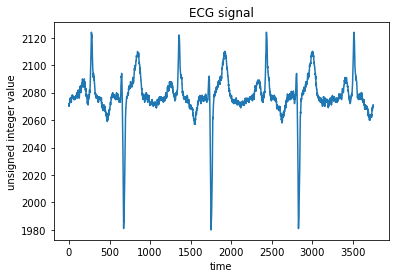

In [5]:

plt.plot(x[:3750],AllSignal[:3750])
plt.title('ECG signal')
plt.xlabel('time')
plt.ylabel('unsigned integer value')

As it can be seen above, 5 cardiac cycles are not covered which implies that person's heart rate is lower than 60. 
lets try plotting 5312 samples assuming 85bpm

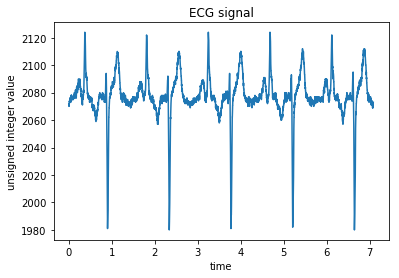

In [3]:

plt.plot(x[:5312],AllSignal[:5312])
plt.title('ECG signal')
plt.xlabel('time')
plt.ylabel('unsigned integer value')

Now we can calculate heart rate by dividing no. of beats / total time *60 i.e. (5/7)*60 equals to 42.8 

maximum is observed at frequency =[ 1.39272533]


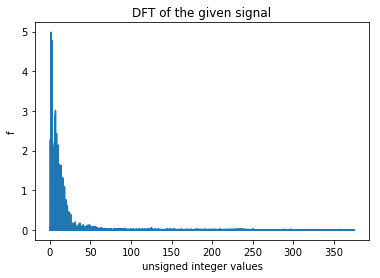

In [26]:
data=AllSignal-np.mean(AllSignal)
Y=np.fft.fft(data)
l=len(data)
Pyy=abs(Y)/l
f=np.arange(0,750/2.,750/43081.)
max_f=np.amax(Pyy)


inx=np.where(Pyy==max_f)

print('maximum is observed at frequency ='+str(f[43081-inx[0]]))
plt.plot(f,Pyy[:21541])
plt.title('DFT of the given signal')
plt.ylabel('f')
plt.xlabel('unsigned integer values')

Frequency with the highest amplitude/peak is 1.39 so the heart rate is 60/1.39=43.1 which is almost the same as we calculated beforehand.
Next step is to design a low pass butterworth filter with cutoff frequency of 100 hz and order 4 that means it will attenuate frequencies above 100hz. cutoff value of digital butterworth filter is cutoff freq/nyquist frequency. this value should be between 0 and 1 where 1 implies Nyquist frequency

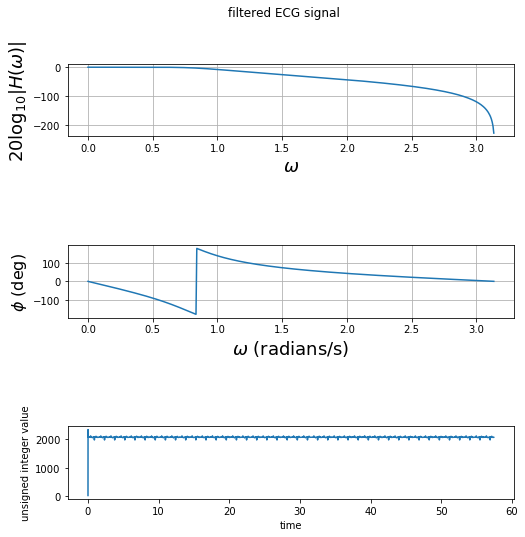

In [19]:
from scipy import signal
fig, axs = plt.subplots(3,1)
plt.subplots_adjust( hspace = 1.5 )
fig.set_size_inches((8,8))

cutoff=100/float(750/2)
b, a = signal.butter(4,cutoff, output='ba')
w, h = signal.freqz(b, a)
ax=axs[0]
ax.plot(w,20*np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r"$\omega$",fontsize=18)
fig.suptitle('amplitude response')
ax.grid()

ax=axs[1]
ax.plot(w,np.angle(h)/np.pi*180)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
fig.suptitle('phase response')
ax.grid()

AllSignal_filter=signal.lfilter(b,a,AllSignal)
ax=axs[2]
ax.plot(x,AllSignal_filter)
fig.suptitle('filtered ECG signal')
ax.set_xlabel('time')
ax.set_ylabel('unsigned integer value')


As seen in the curves above, the filtered signal is highly attenuated all over. now we will do the fourier transform and see if the amplitude modification has altered our heart rate.

maximum is observed at frequency =[ 1.39272533]


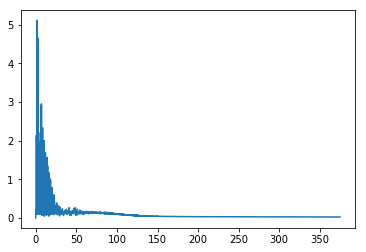

In [30]:
data_fil=AllSignal_filter-np.mean(AllSignal_filter)
Y=np.fft.fft(data_fil)
l=len(data_fil)
Pyy_fil=abs(Y)/l

max_f=np.amax(Pyy_fil)

inx=np.where(Pyy_fil==max_f)

print('maximum is observed at frequency ='+str(f[43081-inx[0]]))
plt.plot(f,Pyy_fil[:21541])


As seen above the noise is removed after 100 hz . also the peak is still at the same frequency i.e. filtering the signal and change in amplitude didnt change the heart rate. This is because the maxima/peak will not change even when all the amplitudes are changed.

References:
1) Cristian Vidal Silva, Andrew Philominraj and Carolina del Río (2011). A DSP Practical Application: Working on ECG Signal, Applications of Digital Signal Processing, Dr. Christian Cuadrado-Laborde (Ed.), InTech, DOI: 10.5772/25499.
2) Oppenheim, A. V., and A. S. Willsky. "Signals and Systems." Prentice-Hall, (1997).